In [151]:
!pip install pyproj

In [152]:
!pip install geopandas

In [153]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
  Using cached Cython-3.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
Found existing installation: Cartopy 0.22.0
Uninstalling Cartopy-0.22.0:
  Successfully uninstalled Cartopy-0.22.0
  Using cached Cartopy-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)


In [154]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
  Using cached shapely-2.0.1-cp310-cp310-linux_x86_64.whl


In [155]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time
import shapely

In [156]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
#ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [157]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [158]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [159]:
columnas_deseadas=['x', 'y']
df_original= df[columnas_deseadas].copy()
df_original

,x,y
0,709584.027559,782579.281866
1,709262.121378,782963.354103
2,710847.924654,784163.825097
3,710863.366771,781635.895608
4,709314.159319,781570.969374
...,...,...
1257,709918.546763,782204.438977
1258,709466.644754,781388.734012
1259,709492.782783,784279.996264
1260,710198.574916,780930.648555


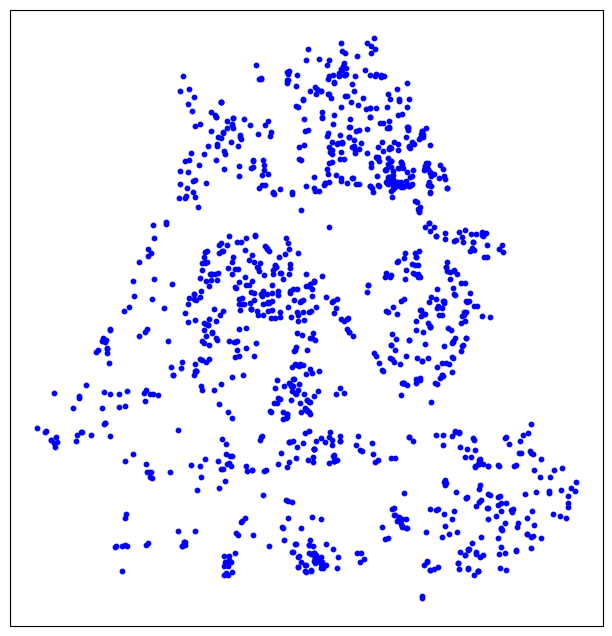

In [160]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
#ax.scatter(df['Longtitude'], df['Lattitude'], zorder=10, c='b', s=10)
plt.show()

In [161]:
#Se carga la cartografía de Floridablanca/Melbourne
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

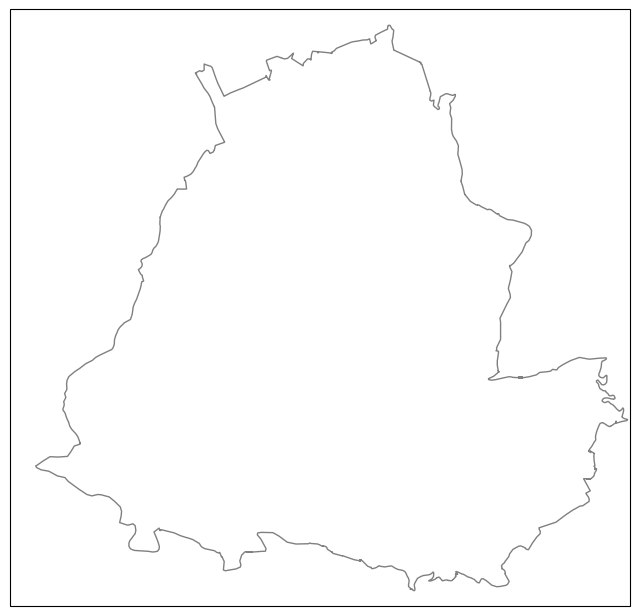

In [162]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

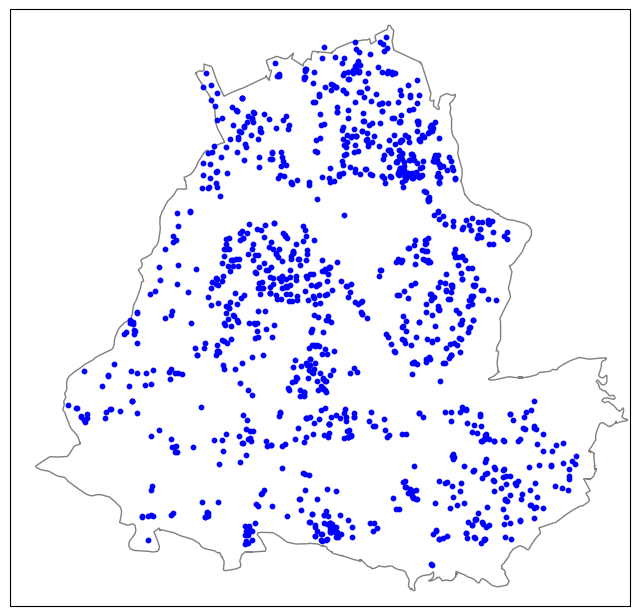

In [163]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [164]:
import geopandas as gpd

# Cargar el shapefile en un DataFrame de GeoPandas
gdf = gpd.read_file('68276_urbano.shp')

# Calcular el área en metros cuadrados para cada geometría en Plate Carrée y agregarlo como una nueva columna
gdf = gdf.to_crs({'init': 'epsg:32663'})  # Plate Carrée (EPSG:32663)
gdf['area_m2'] = gdf['geometry'].area

# Sumar todas las áreas para obtener el área total en metros cuadrados
area_total_m2 = gdf['area_m2'].sum()

print("Área total en metros cuadrados (Plate Carrée):", area_total_m2)



Área total en metros cuadrados (Plate Carrée): 14378860.411779443


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [165]:
def dist_puntos(p1, p2):
  return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5

In [166]:
import numpy as np
from scipy.spatial import cKDTree

# Datos de puntos
points = np.column_stack((df['x'], df['y']))
#points = list(zip(df['x'], df['y']))

def funcion_k(points, max_dist, area):
  num_points = len(points)

  count = 0
  for i in range(num_points):
    for j in range(i+1, num_points):
      if dist_puntos(points[i], points[j]) <= max_dist:
        count += 1

  k = area * count / num_points**2

  return k

valor_k = funcion_k(points, 100, area_total_m2)
valor_k



35914.55888325239

In [167]:
poligono = gpd.read_file("68276_urbano.shp")
crs = poligono.crs
crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

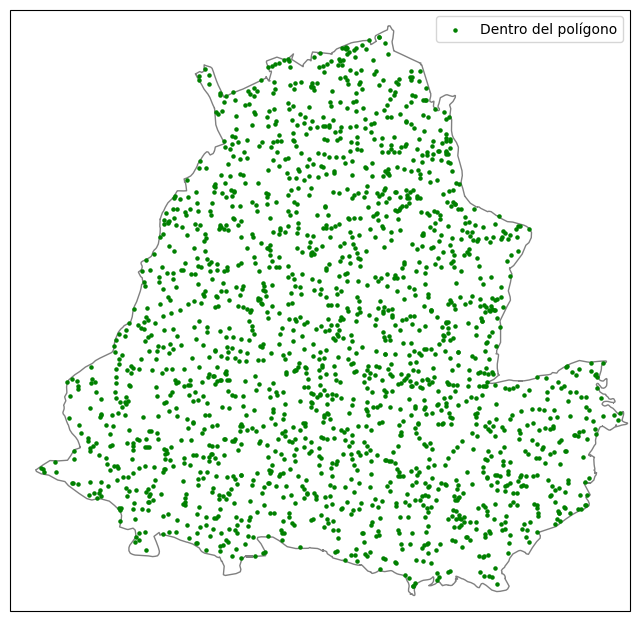

In [168]:
import random
import matplotlib.pyplot as plt
import shapely.geometry as sg
from shapely.geometry import Point
import geopandas as gpd
import cartopy.crs as ccrs

# Definir el contexto de proyección
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Definir los límites geográficos
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

# Configurar los límites del mapa
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Cargar el shapefile que contiene el polígono irregular
gdf = gpd.read_file('68276_urbano.shp')

# Obtener el polígono a partir del shapefile
polygon = gdf.geometry.iloc[0]

# Generar puntos aleatorios dentro del polígono hasta alcanzar el número deseado
points_inside = []
num_points = 1962

while len(points_inside) < num_points:
    x = random.uniform(lower_lon, upper_lon)
    y = random.uniform(lower_lat, upper_lat)
    point = Point(x, y)
    if point.within(polygon):
        points_inside.append(point)

# Dibujar el polígono
gdf.plot(ax=ax, color='white', edgecolor='gray')

# Dibujar los puntos dentro del polígono
x_inside, y_inside = zip(*[(point.x, point.y) for point in points_inside])
ax.scatter(x_inside, y_inside, color='green', s=5, label='Dentro del polígono')

# Mostrar el mapa con el polígono y los puntos
ax.legend()
plt.show()

# Imprimir las coordenadas de los puntos dentro del polígono
#print("\nCoordenadas de los puntos dentro del polígono:")
#for point in points_inside:
#    print(f'({point.x}, {point.y})')

In [169]:
import numpy as np
import geopandas as gpd
import shapely.geometry
import pandas as pd


n_puntos = 1262
num_mapas = 9
mapas_de_puntos = []
coordenadas_proyectadas = []

for grupo in range(1, num_mapas + 1):
    puntos_a = []

    for _ in range(n_puntos):
        while True:
            punto_x = np.random.uniform(poligono.bounds.minx, poligono.bounds.maxx)
            punto_y = np.random.uniform(poligono.bounds.miny, poligono.bounds.maxy)
            punto = shapely.geometry.Point(punto_x, punto_y)

            if poligono.geometry.contains(punto).any():
                coordenadas_proyectadas.append(P(punto_x[0], punto_y[0]))  # Guardar coordenadas cartesianas
                break

# Crear el DataFrame con coordenadas_proyectadas y la columna 'Grupo'
df = pd.DataFrame(coordenadas_proyectadas, columns=['x', 'y'])
df['Grupo'] = np.repeat(np.arange(1, num_mapas + 1), n_puntos)

# Crear 9 DataFrames distintos, uno para cada grupo
dataframes_por_grupo = {}  # Un diccionario para almacenar los DataFrames por grupo

for grupo_numero, grupo_datos in df.groupby('Grupo'):
    dataframes_por_grupo[f'df_grupo{grupo_numero}'] = grupo_datos.copy()

# Ahora hay un diccionario llamado dataframes_por_grupo con 9 DataFrames distintos, uno para cada grupo.
# Se puede acceder a cada DataFrame utilizando dataframes_por_grupo['df_grupoX'], donde X es el número de grupo.


In [170]:
def eliminar_columna_por_grupo(dataframes_por_grupo):
    for grupo_numero in range(1, 10):
        columna_grupo = f'df_grupo{grupo_numero}'
        if columna_grupo in dataframes_por_grupo:
            dataframes_por_grupo[columna_grupo] = dataframes_por_grupo[columna_grupo].drop('Grupo', axis=1)
    return dataframes_por_grupo

# Llama a la función para realizar la operación
dataframes_por_grupo = eliminar_columna_por_grupo(dataframes_por_grupo)

In [171]:
dataframes_por_grupo['df_grupo9']

,x,y
10096,709013.716148,783789.114923
10097,712036.893674,781771.315695
10098,711230.351017,780644.704636
10099,709387.914937,781654.851314
10100,708834.290179,783627.388912
...,...,...
11353,710122.499861,783047.934768
11354,710695.656155,780870.920731
11355,709906.781536,783471.624051
11356,709706.846393,782851.997198


In [172]:
df_grupo1 = dataframes_por_grupo['df_grupo1']
df_grupo2 = dataframes_por_grupo['df_grupo2']
df_grupo3 = dataframes_por_grupo['df_grupo3']
df_grupo4 = dataframes_por_grupo['df_grupo4']
df_grupo5 = dataframes_por_grupo['df_grupo5']
df_grupo6 = dataframes_por_grupo['df_grupo6']
df_grupo7 = dataframes_por_grupo['df_grupo7']
df_grupo8 = dataframes_por_grupo['df_grupo8']
df_grupo9 = dataframes_por_grupo['df_grupo9']

In [173]:
df_grupo1

,x,y
0,712167.937991,781049.372053
1,711604.991291,783254.408571
2,709997.276898,781105.957778
3,711435.987542,782912.978132
4,710006.467896,780856.544400
...,...,...
1257,708644.388910,782302.659638
1258,711574.879691,781665.300218
1259,708506.406101,781796.695952
1260,710596.732510,781393.863708


In [174]:
df_original

,x,y
0,709584.027559,782579.281866
1,709262.121378,782963.354103
2,710847.924654,784163.825097
3,710863.366771,781635.895608
4,709314.159319,781570.969374
...,...,...
1257,709918.546763,782204.438977
1258,709466.644754,781388.734012
1259,709492.782783,784279.996264
1260,710198.574916,780930.648555


In [175]:
print("DataFrame original")
points = np.column_stack((df_original['x'], df_original['y']))
valori_original = funcion_k(points,100,area_total_m2)
print(valori_original)
for i in range(1, 10):
    nombre_df = f'df_grupo{i}'

    dataframe_actual = globals()[nombre_df]
    print("DataFrame",i)
    pointsi = np.column_stack((dataframe_actual['x'], dataframe_actual['y']))
    valorik= funcion_k(pointsi, 100, area_total_m2)
    print(valorik)


DataFrame original
35914.55888325239
DataFrame 1
15555.752879799868
DataFrame 2
15618.95094721635
DataFrame 3
15573.80947049029
DataFrame 4
15591.866061180714
DataFrame 5
15465.469926347749
DataFrame 6
15429.356744966903
DataFrame 7
15456.441631002539
DataFrame 8
15537.696289109443
DataFrame 9
15140.451293920127


In [176]:
dataframes = {
    'df_original': df_original,
    'df_grupo1': df_grupo1,
    'df_grupo2': df_grupo2,
    'df_grupo3': df_grupo3,
    'df_grupo4': df_grupo4,
    'df_grupo5': df_grupo5,
    'df_grupo6': df_grupo6,
    'df_grupo7': df_grupo7,
    'df_grupo8': df_grupo8,
    'df_grupo9': df_grupo9
}

resultados = {'grupo': [], 'distancia_20': [], 'distancia_40': [], 'distancia_60': [], 'distancia_80': [], 'distancia_100': [], 'distancia_120': [], 'distancia_140': [], 'distancia_160': [], 'distancia_180': [], 'distancia_200': []}

for nombre_df, dataframe in dataframes.items():
    resultados['grupo'].append(nombre_df)
    for metros in range(20, 201, 20):
        dataframe_actual = globals()[nombre_df]
        pointsi = np.column_stack((dataframe_actual['x'], dataframe_actual['y']))
        resultado = funcion_k(pointsi, metros, area_total_m2)
        resultados[f'distancia_{metros}'].append(resultado)

df_resultados = pd.DataFrame(resultados)

In [177]:
df_resultados

,grupo,distancia_20,distancia_40,distancia_60,distancia_80,distancia_100,distancia_120,distancia_140,distancia_160,distancia_180,distancia_200
0,df_original,3683.544501,8730.361599,16386.356052,25730.641734,35914.558883,47813.852148,61807.709933,77417.632585,93090.753304,110650.787751
1,df_grupo1,604.895788,2473.752925,5435.033798,9958.209766,15555.752880,21974.870870,29387.101349,38261.915673,48084.701009,58747.117811
2,df_grupo2,595.867493,2663.347127,5895.476860,10247.115217,15618.950947,22065.153824,30136.449862,39372.396000,49312.549176,60408.324155
3,df_grupo3,550.726016,2518.894401,5922.561746,10075.577605,15573.809470,22110.295300,29666.978504,38397.340103,48752.794864,60002.050864
4,df_grupo4,613.924083,2473.752925,5895.476860,10247.115217,15591.866061,22047.097233,29937.827365,38966.122710,49032.672020,59821.484957
5,df_grupo5,659.065560,2374.441676,5272.524482,9741.530677,15465.469926,21884.587917,29450.299416,38839.726575,49195.181336,60634.031538
6,df_grupo6,641.008970,2500.837811,5480.175275,9822.785336,15429.356745,22390.172456,30317.015769,38487.623057,48057.616123,58990.881786
7,df_grupo7,695.178742,2545.979287,5723.939249,10102.662491,15456.441631,22381.144161,30055.195204,39047.377368,49529.228264,60697.229606
8,df_grupo8,749.348514,2591.120764,5380.864026,9723.474087,15537.696289,22507.540296,30262.845997,38866.811461,48834.049522,59695.088823
9,df_grupo9,577.810902,2401.526562,5507.260161,9759.587268,15140.451294,21505.399512,29495.440893,38469.566466,48463.889413,59388.126781


In [178]:
fila_df_original = df_resultados[df_resultados['grupo'] == 'df_original']
percentiles_2_5 = df_resultados.filter(like='distancia_').quantile(0.025)
percentiles_97_5 = df_resultados.filter(like='distancia_').quantile(0.975)

df_final = pd.DataFrame({
    'distancia': [int(col.split('_')[-1]) for col in percentiles_2_5.index],
    'percentil_2.5': percentiles_2_5.values,
    'percentil_97.5': percentiles_97_5.values,
    'K': fila_df_original.iloc[:, 1:].values.flatten()
})

df_final = df_final.sort_values(by='distancia')

df_final

,distancia,percentil_2.5,percentil_97.5,K
0,20,556.820115,3023.350404,3683.544501
1,40,2380.535775,7365.283343,8730.361599
2,60,5296.900879,14032.002333,16386.356052
3,80,9727.536820,22246.848268,25730.641734
4,100,15205.455020,31348.047098,35914.558883
5,120,21590.716903,42119.931981,47813.852148
6,140,29401.320914,54722.303746,61807.709933
7,160,38292.386170,68857.454354,77417.632585
8,180,48063.710222,83289.410170,93090.753304
9,200,58801.964706,99411.237168,110650.787751


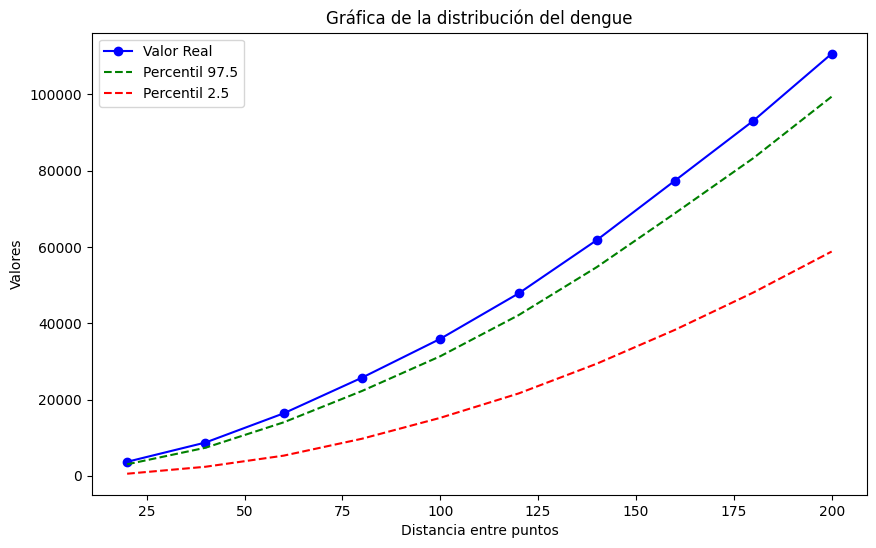

In [179]:
plt.figure(figsize=(10, 6))
plt.plot(df_final['distancia'], df_final['K'], label='Valor Real', color='blue', marker='o')
plt.plot(df_final['distancia'], df_final['percentil_97.5'], label='Percentil 97.5', color='green', linestyle='--')
plt.plot(df_final['distancia'], df_final['percentil_2.5'], label='Percentil 2.5', color='red', linestyle='--')

plt.xlabel('Distancia entre puntos')
plt.ylabel('Valores')
plt.title('Gráfica de la distribución del dengue')
plt.legend()

plt.show()